In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
import glob
import random
import os

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
learning_rate = 0.01
num_epochs = 100
batch_size = 10
num_classes = 10
fully_connected_size = 111000
chpk_dir = 'checkpoints/operation'
chpk_name = 'model'
PATH_TO_TRAIN_IMAGES_DIR = 'data/operation/training_set1'
TRAIN_IMAGE_PATHS = glob.glob(os.path.join(PATH_TO_TRAIN_IMAGES_DIR, '*.png'))

In [3]:
def plotImg(imgs):
    fig = plt.figure()
    for i in range(len(imgs)):
        fig.add_subplot(1, len(imgs), i + 1)
        plt.imshow(imgs[i])
        plt.axis('off')

In [4]:
# training images collection
train_data = []
train_labels = []

for image_path in TRAIN_IMAGE_PATHS:
    cls = int(image_path[image_path.rfind('/')+1:image_path.index('-')])
    img = cv2.imread(image_path, cv2.IMREAD_UNCHANGED)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    train_data.append(img)
    train_labels.append(cls)
images = np.reshape(train_data, [-1, fully_connected_size])
labels = np.eye(num_classes)[train_labels]
print(np.shape(images), np.shape(labels))

(102, 111000) (102, 10)


In [5]:
# Placeholders
image_holder = tf.placeholder(tf.float32, [None, fully_connected_size], name='image_holder')
label_holder = tf.placeholder(tf.float32, [None, num_classes], name='label_holder')

In [6]:
# Variables
m = tf.Variable(tf.zeros([fully_connected_size, num_classes]))
b = tf.Variable(tf.zeros([num_classes]))

In [7]:
# Compute loss
logits=tf.matmul(image_holder, m) + b
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = label_holder)
loss = tf.reduce_mean(cross_entropy)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [8]:
# Compute accuracy
prediction = tf.matmul(image_holder, m) + b
predictions = tf.argmax(prediction, 1, name='prediction')
correct_pred = tf.equal(predictions, tf.argmax(label_holder, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [9]:
# Create optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

In [10]:
# Initialize variables
init = tf.global_variables_initializer()
# Launch session
sess = tf.Session()
sess.run(init)
# saver for storing training result
saver = tf.train.Saver()

In [11]:
total = len(images)
num_batches = int(total/batch_size)
# Loop over epochs
for epoch in range(1, num_epochs + 1):
    # Loop over batches
    for batch in range(1, num_batches + 1):
        startIndex = random.randint(0, total-batch_size)
        endIndex = startIndex + batch_size
        _, lossVal, accu = sess.run([optimizer, loss, accuracy],
        feed_dict={image_holder: images[startIndex:endIndex], 
        label_holder: labels[startIndex:endIndex]})
        # Display the final loss
        print('epoch:', epoch, 'batch', batch, 'loss: ', lossVal, 'accuracy: ', accu)

epoch: 1 batch 1 loss:  2.3025851 accuracy:  0.2
epoch: 1 batch 2 loss:  1941153.8 accuracy:  0.7
epoch: 1 batch 3 loss:  2312028.5 accuracy:  0.2
epoch: 1 batch 4 loss:  4232357.0 accuracy:  0.6
epoch: 1 batch 5 loss:  12084072.0 accuracy:  0.1
epoch: 1 batch 6 loss:  3172899.5 accuracy:  0.8
epoch: 1 batch 7 loss:  3196151.2 accuracy:  0.6
epoch: 1 batch 8 loss:  1828486.4 accuracy:  0.7
epoch: 1 batch 9 loss:  1327379.6 accuracy:  0.7
epoch: 1 batch 10 loss:  339703.2 accuracy:  0.8
epoch: 2 batch 1 loss:  510096.9 accuracy:  0.9
epoch: 2 batch 2 loss:  87895.15 accuracy:  0.9
epoch: 2 batch 3 loss:  1164035.8 accuracy:  0.5
epoch: 2 batch 4 loss:  4252993.0 accuracy:  0.6
epoch: 2 batch 5 loss:  694133.1 accuracy:  0.6
epoch: 2 batch 6 loss:  3041211.2 accuracy:  0.6
epoch: 2 batch 7 loss:  2360903.0 accuracy:  0.6
epoch: 2 batch 8 loss:  5237813.5 accuracy:  0.3
epoch: 2 batch 9 loss:  2666279.2 accuracy:  0.8
epoch: 2 batch 10 loss:  905096.8 accuracy:  0.8
epoch: 3 batch 1 loss:

epoch: 20 batch 5 loss:  216687.2 accuracy:  0.9
epoch: 20 batch 6 loss:  327317.06 accuracy:  0.8
epoch: 20 batch 7 loss:  0.0 accuracy:  1.0
epoch: 20 batch 8 loss:  295257.1 accuracy:  0.8
epoch: 20 batch 9 loss:  349469.03 accuracy:  0.9
epoch: 20 batch 10 loss:  630707.5 accuracy:  0.8
epoch: 21 batch 1 loss:  2580154.5 accuracy:  0.3
epoch: 21 batch 2 loss:  1836670.0 accuracy:  0.9
epoch: 21 batch 3 loss:  1764990.8 accuracy:  0.7
epoch: 21 batch 4 loss:  367188.66 accuracy:  0.9
epoch: 21 batch 5 loss:  14126.9 accuracy:  0.9
epoch: 21 batch 6 loss:  19949.5 accuracy:  0.9
epoch: 21 batch 7 loss:  1103807.4 accuracy:  0.8
epoch: 21 batch 8 loss:  0.0 accuracy:  1.0
epoch: 21 batch 9 loss:  0.0 accuracy:  1.0
epoch: 21 batch 10 loss:  208155.7 accuracy:  0.9
epoch: 22 batch 1 loss:  1675171.6 accuracy:  0.5
epoch: 22 batch 2 loss:  2696618.8 accuracy:  0.7
epoch: 22 batch 3 loss:  0.0 accuracy:  1.0
epoch: 22 batch 4 loss:  0.0 accuracy:  1.0
epoch: 22 batch 5 loss:  322009.56 a

epoch: 39 batch 10 loss:  0.0 accuracy:  1.0
epoch: 40 batch 1 loss:  0.0 accuracy:  1.0
epoch: 40 batch 2 loss:  0.0 accuracy:  1.0
epoch: 40 batch 3 loss:  0.0 accuracy:  1.0
epoch: 40 batch 4 loss:  0.0 accuracy:  1.0
epoch: 40 batch 5 loss:  0.0 accuracy:  1.0
epoch: 40 batch 6 loss:  0.0 accuracy:  1.0
epoch: 40 batch 7 loss:  0.0 accuracy:  1.0
epoch: 40 batch 8 loss:  0.0 accuracy:  1.0
epoch: 40 batch 9 loss:  110724.95 accuracy:  0.8
epoch: 40 batch 10 loss:  250171.0 accuracy:  0.9
epoch: 41 batch 1 loss:  478419.7 accuracy:  0.8
epoch: 41 batch 2 loss:  225517.75 accuracy:  0.9
epoch: 41 batch 3 loss:  80452.85 accuracy:  0.9
epoch: 41 batch 4 loss:  327990.16 accuracy:  0.9
epoch: 41 batch 5 loss:  45307.7 accuracy:  0.9
epoch: 41 batch 6 loss:  119135.55 accuracy:  0.9
epoch: 41 batch 7 loss:  80993.0 accuracy:  0.9
epoch: 41 batch 8 loss:  97473.65 accuracy:  0.9
epoch: 41 batch 9 loss:  15991.5 accuracy:  0.9
epoch: 41 batch 10 loss:  360343.84 accuracy:  0.8
epoch: 42 b

epoch: 59 batch 5 loss:  0.0 accuracy:  1.0
epoch: 59 batch 6 loss:  0.0 accuracy:  1.0
epoch: 59 batch 7 loss:  0.0 accuracy:  1.0
epoch: 59 batch 8 loss:  0.0 accuracy:  1.0
epoch: 59 batch 9 loss:  0.0 accuracy:  1.0
epoch: 59 batch 10 loss:  0.0 accuracy:  1.0
epoch: 60 batch 1 loss:  0.0 accuracy:  1.0
epoch: 60 batch 2 loss:  0.0 accuracy:  1.0
epoch: 60 batch 3 loss:  0.0 accuracy:  1.0
epoch: 60 batch 4 loss:  0.0 accuracy:  1.0
epoch: 60 batch 5 loss:  0.0 accuracy:  1.0
epoch: 60 batch 6 loss:  0.0 accuracy:  1.0
epoch: 60 batch 7 loss:  0.0 accuracy:  1.0
epoch: 60 batch 8 loss:  0.0 accuracy:  1.0
epoch: 60 batch 9 loss:  0.0 accuracy:  1.0
epoch: 60 batch 10 loss:  0.0 accuracy:  1.0
epoch: 61 batch 1 loss:  0.0 accuracy:  1.0
epoch: 61 batch 2 loss:  0.0 accuracy:  1.0
epoch: 61 batch 3 loss:  0.0 accuracy:  1.0
epoch: 61 batch 4 loss:  0.0 accuracy:  1.0
epoch: 61 batch 5 loss:  0.0 accuracy:  1.0
epoch: 61 batch 6 loss:  0.0 accuracy:  1.0
epoch: 61 batch 7 loss:  0.0 a

epoch: 78 batch 10 loss:  0.0 accuracy:  1.0
epoch: 79 batch 1 loss:  13879.1 accuracy:  0.9
epoch: 79 batch 2 loss:  150540.25 accuracy:  0.8
epoch: 79 batch 3 loss:  0.0 accuracy:  1.0
epoch: 79 batch 4 loss:  40988.75 accuracy:  0.9
epoch: 79 batch 5 loss:  0.0 accuracy:  1.0
epoch: 79 batch 6 loss:  0.0 accuracy:  1.0
epoch: 79 batch 7 loss:  0.0 accuracy:  1.0
epoch: 79 batch 8 loss:  0.0 accuracy:  1.0
epoch: 79 batch 9 loss:  0.0 accuracy:  1.0
epoch: 79 batch 10 loss:  0.0 accuracy:  1.0
epoch: 80 batch 1 loss:  0.0 accuracy:  1.0
epoch: 80 batch 2 loss:  0.0 accuracy:  1.0
epoch: 80 batch 3 loss:  0.0 accuracy:  1.0
epoch: 80 batch 4 loss:  0.0 accuracy:  1.0
epoch: 80 batch 5 loss:  0.0 accuracy:  1.0
epoch: 80 batch 6 loss:  0.0 accuracy:  1.0
epoch: 80 batch 7 loss:  0.0 accuracy:  1.0
epoch: 80 batch 8 loss:  0.0 accuracy:  1.0
epoch: 80 batch 9 loss:  0.0 accuracy:  1.0
epoch: 80 batch 10 loss:  0.0 accuracy:  1.0
epoch: 81 batch 1 loss:  0.0 accuracy:  1.0
epoch: 81 batc

epoch: 98 batch 4 loss:  0.0 accuracy:  1.0
epoch: 98 batch 5 loss:  0.0 accuracy:  1.0
epoch: 98 batch 6 loss:  0.0 accuracy:  1.0
epoch: 98 batch 7 loss:  0.0 accuracy:  1.0
epoch: 98 batch 8 loss:  0.0 accuracy:  1.0
epoch: 98 batch 9 loss:  0.0 accuracy:  1.0
epoch: 98 batch 10 loss:  0.0 accuracy:  1.0
epoch: 99 batch 1 loss:  0.0 accuracy:  1.0
epoch: 99 batch 2 loss:  0.0 accuracy:  1.0
epoch: 99 batch 3 loss:  0.0 accuracy:  1.0
epoch: 99 batch 4 loss:  0.0 accuracy:  1.0
epoch: 99 batch 5 loss:  0.0 accuracy:  1.0
epoch: 99 batch 6 loss:  0.0 accuracy:  1.0
epoch: 99 batch 7 loss:  0.0 accuracy:  1.0
epoch: 99 batch 8 loss:  0.0 accuracy:  1.0
epoch: 99 batch 9 loss:  0.0 accuracy:  1.0
epoch: 99 batch 10 loss:  0.0 accuracy:  1.0
epoch: 100 batch 1 loss:  0.0 accuracy:  1.0
epoch: 100 batch 2 loss:  0.0 accuracy:  1.0
epoch: 100 batch 3 loss:  0.0 accuracy:  1.0
epoch: 100 batch 4 loss:  0.0 accuracy:  1.0
epoch: 100 batch 5 loss:  0.0 accuracy:  1.0
epoch: 100 batch 6 loss: 

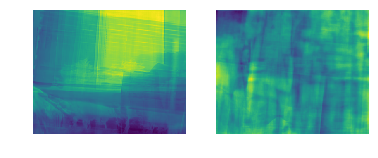

In [12]:
a = np.reshape(sess.run(m)[:,0], [300, -1])
b = np.reshape(sess.run(m)[:,1], [300, -1])
plotImg([a,b])

In [13]:
# save training result
saver.save(sess, os.path.join(chpk_dir, chpk_name))
# following predictions will using stored model
sess.close()

In [14]:
# restore checkpoint
sessRes = tf.Session()
saver = tf.train.import_meta_graph(os.path.join(chpk_dir, chpk_name) + '.meta')
saver.restore(sessRes, tf.train.latest_checkpoint(chpk_dir))

INFO:tensorflow:Restoring parameters from checkpoints/operation/model


In [15]:
pred = sessRes.graph.get_tensor_by_name('prediction:0')
img_holder = sessRes.graph.get_tensor_by_name('image_holder:0')
sessRes.run(pred, feed_dict={img_holder:images})

array([1, 0, 0, 5, 0, 5, 0, 0, 1, 5, 0, 0, 5, 0, 0, 0, 0, 5, 1, 5, 1, 0,
       1, 0, 1, 5, 1, 5, 5, 5, 1, 5, 0, 5, 1, 1, 0, 5, 0, 5, 5, 5, 5, 5,
       0, 5, 5, 5, 5, 1, 0, 0, 5, 5, 5, 0, 5, 5, 1, 5, 1, 0, 5, 1, 0, 5,
       5, 0, 5, 5, 1, 5, 1, 1, 5, 5, 1, 0, 5, 1, 5, 5, 0, 5, 5, 1, 5, 5,
       5, 5, 5, 5, 0, 0, 1, 1, 1, 5, 0, 0, 1, 0])

In [16]:
sessRes.close()

In [17]:
s1 = tf.Session()
s2 = tf.Session()

In [18]:
print(s1, s2)
print(s1.graph, s2.graph)

<tensorflow.python.client.session.Session object at 0x131e1c780> <tensorflow.python.client.session.Session object at 0x131e1c940>
<tensorflow.python.framework.ops.Graph object at 0x12cc32b00> <tensorflow.python.framework.ops.Graph object at 0x12cc32b00>
